In [24]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(96, 3, strides=1, activation='relu', input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, strides=2))

In [18]:
model.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, strides=2))

model.add(tf.keras.layers.Conv2D(384, 3, strides=1,padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(384, 3, strides=1,padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=50,
          validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 18s 46ms/step - loss: 0.1481 - accuracy: 0.9516 - val_loss: 0.9393 - val_accuracy: 0.7616
Epoch 2/50
391/391 [==============================] - 19s 47ms/step - loss: 0.1245 - accuracy: 0.9605 - val_loss: 1.1847 - val_accuracy: 0.7410
Epoch 3/50
391/391 [==============================] - 18s 46ms/step - loss: 0.1152 - accuracy: 0.9643 - val_loss: 0.9290 - val_accuracy: 0.7995
Epoch 4/50
391/391 [==============================] - 18s 47ms/step - loss: 0.1005 - accuracy: 0.9685 - val_loss: 1.1973 - val_accuracy: 0.7426
Epoch 5/50
391/391 [==============================] - 18s 46ms/step - loss: 0.0911 - accuracy: 0.9709 - val_loss: 0.9405 - val_accuracy: 0.8105
Epoch 6/50
391/391 [==============================] - 19s 48ms/step - loss: 0.0942 - accuracy: 0.9707 - val_loss: 1.0437 - val_accuracy: 0.7819
Epoch 7/50
391/391 [==============================] - 19s 48ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.9525 - val_accuracy:

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2529025077819824
Test accuracy: 0.8208000063896179


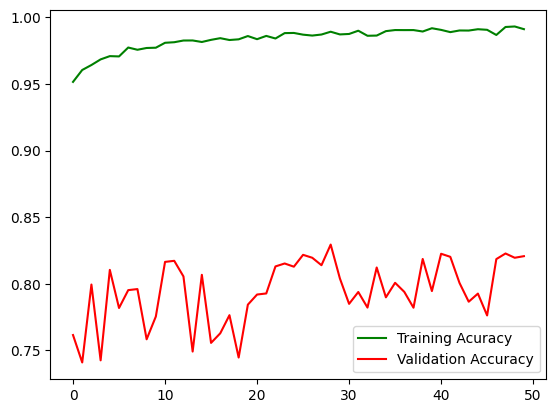

In [26]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

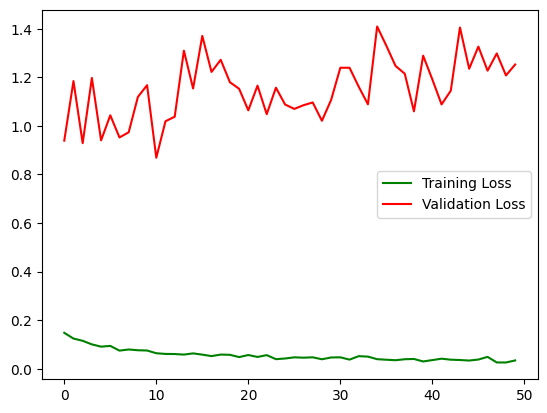

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

313/313 [==============================] - 2s 5ms/step


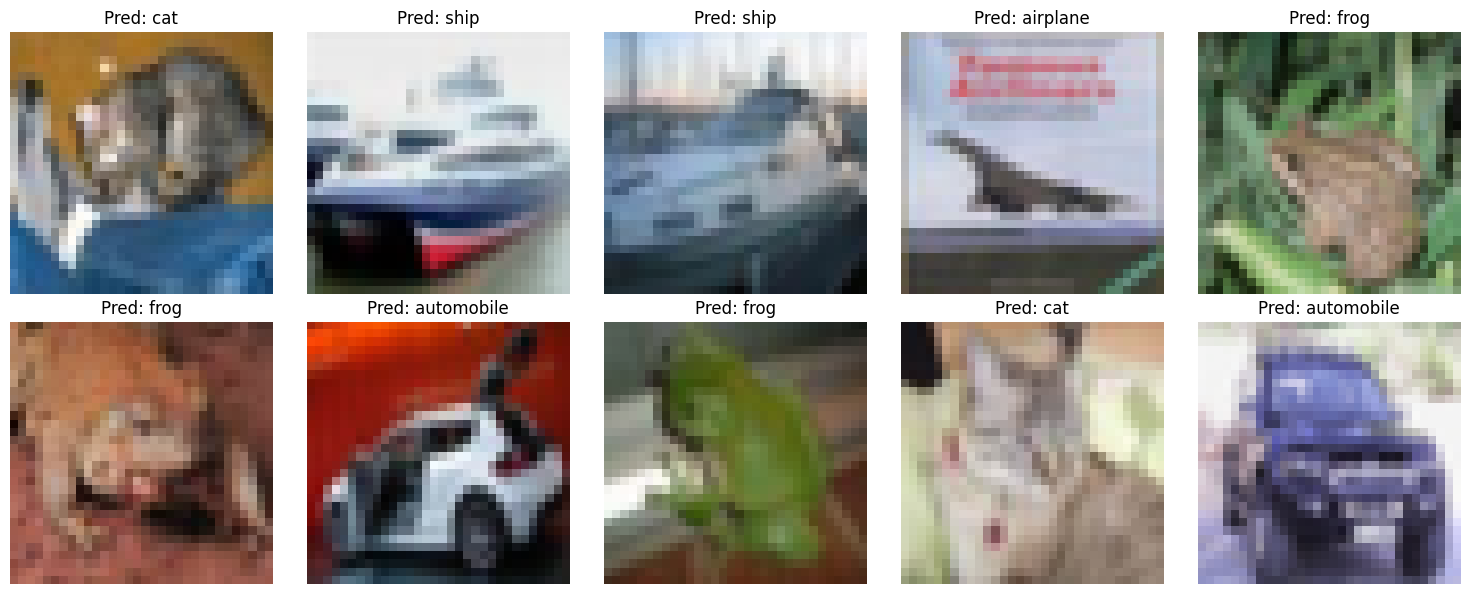

In [28]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_test[i].reshape(32, 32, 3)
    ax.imshow(image)
    ax.set_title(f'Pred: {classes[pred_labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()